In [7]:
import pickle
from collections import defaultdict
import rankaggregation as ra
import matplotlib.pyplot as plt

In [8]:
folder_main = 'data/recommendation'
folder = folder_main + '/lak2'

### Open logs

In [9]:
folds = 5
fquestions = []
f_avg_questions = []
f_students = []

q_dict = defaultdict(int)
q_dict_avg = defaultdict(int)

for i in range(1, folds+1):
    count_questions = defaultdict(int)
    count_avg_questions = defaultdict(int)
    student_questions = defaultdict(int)
    with open('%s/fold_%i/skill_7_concept_5_ls_0.1_lt_0.1_lq_0_lbias_0.01_pw_0.1_markov_1_lr_0.1_max_iter_10_topk_3_user_rec_dict.pkl' % (folder, i), 'rb') as pklfile:
        data = pickle.load(pklfile)
        for user_id, recommendations in data.items():
            for question_id, count in recommendations.items():
                count_questions[question_id] += count
                q_dict[question_id] += count
                student_questions[question_id] += 1
    fquestions.append(count_questions)
    # Average values per student
    for key, value in count_questions.items():
        count_avg_questions[key] += value/student_questions[key]
    f_avg_questions.append(count_avg_questions)
    f_students.append(student_questions)
    

cq_total = defaultdict(int)
student_total = defaultdict(int)
avg_total = defaultdict(float)
for fold, count_questions in enumerate(fquestions):
    for key, value in count_questions.items():
        cq_total[key] += value
        student_total[key] += f_students[fold][key]
        

for key, value in cq_total.items():
    avg_total[key] = value/student_total[key]

In [10]:
sorted_fquestions = []
for count_questions in fquestions:
    sorted_count_questions = {k: v for k, v in sorted(count_questions.items(), reverse=True, key=lambda item: item[1])}
    sorted_fquestions.append(list(sorted_count_questions.keys()))
    
sorted_f_avg_questions = []
for count_avg_questions in f_avg_questions:
    sorted_count_avg_questions = {k: v for k, v in sorted(count_avg_questions.items(), reverse=True, key=lambda item: item[1])}
    sorted_f_avg_questions.append(list(sorted_count_avg_questions.keys()))
    
sorted_avg_total = {k: v for k, v in sorted(avg_total.items(), reverse=True, key=lambda item: item[1])}

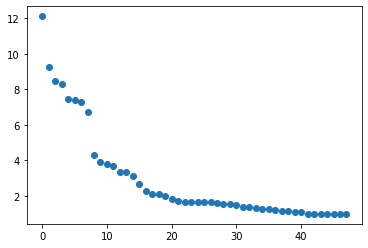

In [11]:
plt.scatter(range(len(sorted_avg_total)), list(sorted_avg_total.values()))
# plt.yscale('log')

In [12]:
print("Top recommended questions:")
for fold in sorted_fquestions:
#     print(list(fold.keys())[:3])
    print(fold[:3])
    
print("Least recommended questions:")
for fold in sorted_fquestions:
    print(fold[-10:])

print("Top recommended questions (averaged by students):")
for fold in sorted_f_avg_questions:
#     print(list(fold.keys())[:3])
    print(fold[:3])
    
print("Least recommended questions (averaged by students):")
for fold in sorted_f_avg_questions:
#     print(list(fold.keys())[-10:])
    print(fold[-10:])

Top recommended questions:
[9, 34, 29]
[9, 34, 4]
[9, 34, 4]
[9, 34, 4]
[9, 34, 40]
Least recommended questions:
[47, 16, 11, 3, 13, 21, 43, 12, 24, 31]
[1, 44, 31, 23, 30, 21, 42, 24, 12, 33]
[42, 3, 43, 12, 46, 35, 31, 16, 30, 15]
[46, 16, 42, 35, 19, 21, 45, 41, 47, 32]
[24, 11, 23, 14, 21, 3, 45, 31, 33, 44]
Top recommended questions (averaged by students):
[9, 29, 10]
[9, 34, 10]
[28, 9, 4]
[29, 9, 40]
[9, 5, 34]
Least recommended questions (averaged by students):
[32, 13, 47, 16, 21, 43, 12, 3, 24, 31]
[31, 39, 32, 23, 30, 21, 42, 24, 12, 33]
[32, 12, 42, 3, 46, 35, 31, 16, 30, 15]
[19, 21, 45, 38, 46, 16, 42, 41, 47, 32]
[18, 16, 3, 46, 23, 32, 21, 31, 33, 44]


In [13]:
agg = ra.RankAggregator()
agg_result = agg.average_rank(sorted_fquestions)#, unranked='split')
rank_list = list(zip(*agg_result))
rank = [int(i) for i in rank_list[0]]
weight_list = rank_list[1]
print("Top recommended questions")
print(rank[:5])
print("Least recommended questions")
print(rank[-10:])
print("Avg recommended questions")
print(rank[len(rank)//2-5:len(rank)//2+5])

Top recommended questions
[9, 34, 40, 0, 29]
Least recommended questions
[44, 3, 30, 31, 11, 12, 21, 24, 45, 33]
Avg recommended questions
[22, 19, 15, 18, 36, 2, 1, 38, 46, 35]


In [14]:
agg = ra.RankAggregator()
agg_result = agg.average_rank(sorted_f_avg_questions)#, unranked='split')
rank_list = list(zip(*agg_result))
rank = [int(i) for i in rank_list[0]]
weight_list = rank_list[1]
print("Top recommended questions")
print(rank[:5])
print("Least recommended questions")
print(rank[-10:])
print("Avg recommended questions")
print(rank[len(rank)//2-5:len(rank)//2+5])

Top recommended questions
[9, 34, 29, 40, 5]
Least recommended questions
[16, 42, 31, 32, 30, 12, 3, 21, 24, 33]
Avg recommended questions
[22, 25, 13, 19, 38, 15, 14, 1, 35, 27]


### Open reference pickle

In [15]:
with open('%s/single_resource_indexed_filtered_data.pkl' % folder, 'rb') as pklfile:
    data = pickle.load(pklfile)
    q_ids_ref = data['learning_material_id_mapping']

In [16]:
original_idx = [q_ids_ref[(0, int(question))][1] for question in rank]
print("Top recommended questions")
print(original_idx[:2])
print("Least recommended questions")
print(original_idx[-2:])
print("Avg recommeded questions")
print(original_idx[len(original_idx)//2-1:len(original_idx)//2+1])

Top recommended questions
[129, 130]
Least recommended questions
[124, 69]
Avg recommeded questions
[125, 104]


In [17]:
with open('%s/questions_idx.pkl' % folder, 'rb') as pklfile:
    questions_idx = pickle.load(pklfile)
    
with open('%s/q_matrix.pkl' % folder, 'rb') as pklfile:
    q_matrix = pickle.load(pklfile)
    
with open('%s/concept_idx.pkl' % folder, 'rb') as pklfile:
    concept_idx = pickle.load(pklfile)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def sort_distribution(df, columns, min_score=0.3):
    """ Sort topic assignment distribution """
    ids = []
    for col in columns:
        ids_col = np.where(df.idxmax(axis=1) == col)
        ids_col = df.loc[ids_col].sort_values([col], ascending=False).index.tolist()
        ids += ids_col

    df_sorted = df.loc[ids]
    return df_sorted

def normalize(matrix):
    """ Normalize sum per row """
    row_sums = matrix.sum()
    matrix_norm = matrix / row_sums
    return matrix_norm


def plot_distribution(df, cmap=sns.cm.rocket,
                       ylabel=None, title=None, savefig=None):

    # Create a figure instance, and the two subplots
#     fig = plt.figure(figsize=(8,10))
    fig = plt.figure()
    ax = fig.add_subplot(111)

    sns.heatmap(df, ax=ax, cmap=cmap, cbar_kws={'label': 'Concept probability'},
                robust=True, square=True, vmin=0, vmax=0.5)
    # use matplotlib.colorbar.Colorbar object
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
#     cbar.ax.tick_params(labelsize=14)
#     cbar.ax.set_ylabel("Topic weight", fontsize=14)
    ax.tick_params(labelsize=12)
    ax.xaxis.tick_top()
    ax.tick_params('x', labelrotation=90)
    ax.set_yticks([])

    if ylabel:
        ax.set_ylabel(ylabel, fontsize=14)

    if title:
        ax.set_title(title, fontsize=18, y=100)
    
    plt.tight_layout()
    
    if savefig:
        plt.savefig(savefig + '.eps', format='eps')
        plt.savefig(savefig + '.png', format='png')
    plt.show()
    return None

In [53]:
concepts = Concept.objects.filter(pk__in=concept_idx).order_by('pk').values_list('label', flat=True)

In [55]:
list(concepts)

['Syntax',
 'Assignment',
 'Data type: number',
 'Data type: boolean',
 'Math',
 'Logic',
 'Data type: string',
 'Data type: list (or array)',
 'Data type: tuple',
 'Conditional',
 'Loop',
 'Nested loop',
 'Function']

In [58]:
with open('%s/concepts.pkl' % folder, 'wb') as pklfile:
    pickle.dump(list(concepts), pklfile)

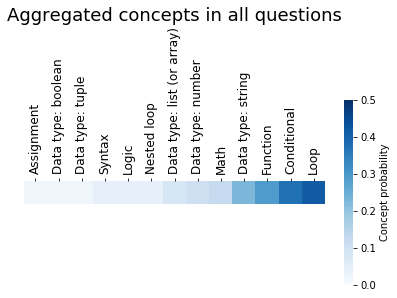

In [59]:
df = pd.Series(q_matrix.sum(axis=1)/q_matrix.shape[1], index=concepts).sort_values()
plot_distribution(df.to_frame().T, cmap='Blues', savefig="%s/regular" % folder, 
                  title="Aggregated concepts in all questions")

### Distribution considering all questions

In [60]:
weighted_qmatrix = q_matrix.copy()
# for question, weight in q_dict.items():
for question, weight in avg_total.items():
# for question in q_dict.keys():
    original_id = q_ids_ref[(0, question)][1]
    q_matrix_id = questions_idx.index(original_id)
#     weight_idx = rank.index(str(question))
#     weight = 1/(weight_idx+1)
    weighted_qmatrix[:, q_matrix_id] += q_matrix[:, q_matrix_id] * weight

In [61]:
# weighted_df = pd.Series(weighted_qmatrix.sum(axis=1)/sum(q_dict.values()), index=concepts).sort_values()
weighted_df = pd.Series(weighted_qmatrix.sum(axis=1)/sum(avg_total.values()), index=concepts).sort_values()
weighted_df = weighted_df.reindex(df.index)

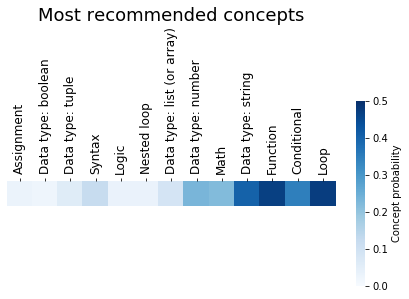

In [62]:
plot_distribution(weighted_df.to_frame().T, cmap='Blues', savefig="%s/all" % folder,
                 title="Most recommended concepts")

### Distribution considering top recommended questions

In [63]:
sum(q_dict.values())

6342

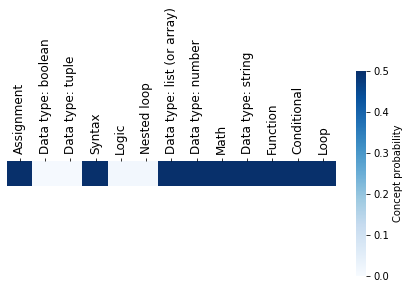

In [68]:
weighted_qmatrix = q_matrix.copy()
# for question, weight in q_dict.items():
# for question in rank[:len(rank)//3]:
for question, weight in list(avg_total.items())[:len(rank)//3]:
    original_id = q_ids_ref[(0, question)][1]
    q_matrix_id = questions_idx.index(original_id)
#     weight_idx = rank.index(str(question))
#     weight = 1/(weight_idx+1)
    weight = q_dict[question]
    weighted_qmatrix[:, q_matrix_id] += q_matrix[:, q_matrix_id] * weight
# weighted_df = pd.Series(weighted_qmatrix.sum(axis=1)/sum(q_dict.values()), index=concepts).sort_values()
weighted_df = pd.Series(weighted_qmatrix.sum(axis=1)/sum(avg_total.values()), index=concepts).sort_values()
weighted_df = weighted_df.reindex(df.index)
plot_distribution(weighted_df.to_frame().T, cmap='Blues', savefig="%s/top" % folder)

In [69]:
# for question in rank[:len(rank)//3]:
for question, weight in list(avg_total.items())[:len(rank)//3]:
    original_id = q_ids_ref[(0, question)][1]
    p = Problem.objects.get(pk=original_id)
    print(p.content)

Define a function which can compute the sum of two numbers.
Define a function that can convert a integer into a string and return the string.
Create a function that will output the grade according to the exam score. Use the following rules:
1) If the user got 80 points or more, the function should return the grade A.
2) If the user got between 60 and 79, they got a B.
3) If the user got between 40 and 59, they got a C.
4) If the user got between 20 and 39, they got a D.
5) If the user got less then 20 points, they get an E.

Write a function that takes as argument a list (for example: numlist = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]) and returns only the elements of the list that are less than 5.
Write a program that computes the value of a+aa+aaa+aaaa with a given digit as the value of a.
Suppose the following input is supplied to the program:
9
Then, the output should be:
11106
Write a function that receives as argument how many goals Team One scored and how many goals Team Two score

### Distribution considering avg recommended questions

In [ ]:
weighted_qmatrix = q_matrix.copy()
# for question, weight in q_dict.items():
for question in rank[len(rank)//3:2*len(rank)//3]:
    original_id = q_ids_ref[(0, question)][1]
    q_matrix_id = questions_idx.index(original_id)
#     weight_idx = rank.index(str(question))
#     weight = 1/(weight_idx+1)
    weight = q_dict[question]
    weighted_qmatrix[:, q_matrix_id] += q_matrix[:, q_matrix_id] * weight
weighted_df = pd.Series(weighted_qmatrix[:,len(rank)//3:2*len(rank)//3].sum(axis=1)/sum(q_dict.values()), index=concepts).sort_values()
weighted_df = weighted_df.reindex(df.index)
plot_distribution(weighted_df.to_frame().T, cmap='Blues', savefig="%s/avg" % folder)

In [ ]:
for question in rank[len(rank)//3:2*len(rank)//3]:
    original_id = q_ids_ref[(0, question)][1]
    p = Problem.objects.get(pk=original_id)
    print(p.content)

### Distribution considering less recommended questions

In [ ]:
weighted_qmatrix = q_matrix.copy()
less_rec_qmatrix = []
for question in rank[2*len(rank)//3:]:
    original_id = q_ids_ref[(0, question)][1]
    q_matrix_id = questions_idx.index(original_id)
    less_rec_qmatrix.append(q_matrix[:, q_matrix_id])
    weight = q_dict[question]
    weighted_qmatrix[:, q_matrix_id] += q_matrix[:, q_matrix_id] * weight
weighted_df = pd.Series(weighted_qmatrix[:,2*len(rank)//3:].sum(axis=1), index=concepts)
# .sort_values()
weighted_df = weighted_df.reindex(df.index)
weighted_qmatrix[:,2*len(rank)//3:].sum(axis=1)
plot_distribution(weighted_df.to_frame().T, cmap='Blues', savefig="%s/least" % folder)

In [ ]:
for question in rank[2*len(rank)//3:]:
    original_id = q_ids_ref[(0, question)][1]
    p = Problem.objects.get(pk=original_id)
    print(p.content)

In [ ]:
concepts

In [ ]:
less_rec_qmatrix

In [ ]:
import imageio
images = []
filenames = ["top", "avg", "least"]
for filename in filenames:
    images.append(imageio.imread("%s/%s.eps" % (folder, filename)))
imageio.mimsave('%s/movie.gif' % folder, images, duration=1)

In [ ]:
from IPython.display import Image
Image(filename="%s/movie.gif" % folder)